In [1]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [2]:
df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180


In [3]:
#calculate the mean price for each cities

In [9]:
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [10]:
# replace each city with its mean price

In [11]:
df['city_encoded'] = df['city'].map(mean_price)

In [12]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [13]:
import seaborn as sns

In [16]:
df1 = sns.load_dataset('tips')

In [19]:
mean_bill = df1.groupby('day',observed=False)['total_bill'].mean().to_dict()
mean_bill

{'Thur': 17.682741935483868,
 'Fri': 17.15157894736842,
 'Sat': 20.44137931034483,
 'Sun': 21.41}

In [20]:
df1['day_encoded']= df1['day'].map(mean_bill)

In [21]:
df1

,total_bill,tip,sex,smoker,day,time,size,day_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,21.410000
1,10.34,1.66,Male,No,Sun,Dinner,3,21.410000
2,21.01,3.50,Male,No,Sun,Dinner,3,21.410000
3,23.68,3.31,Male,No,Sun,Dinner,2,21.410000
4,24.59,3.61,Female,No,Sun,Dinner,4,21.410000
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.441379
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.441379
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.441379
242,17.82,1.75,Male,No,Sat,Dinner,2,20.441379


<Axes: xlabel='total_bill', ylabel='day_encoded'>

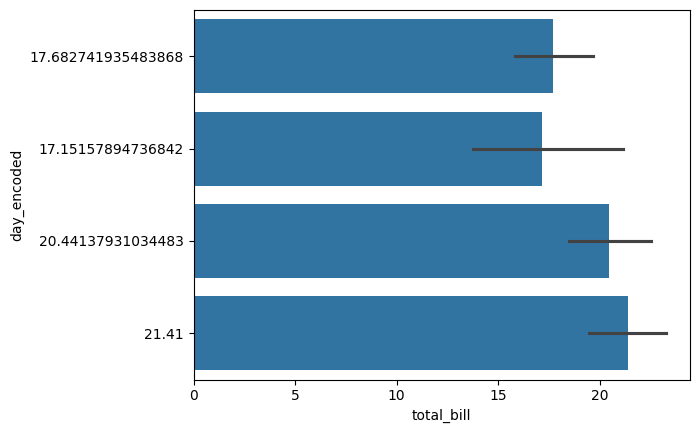

In [27]:
sns.barplot(x=df1['total_bill'],y=df1['day_encoded'])

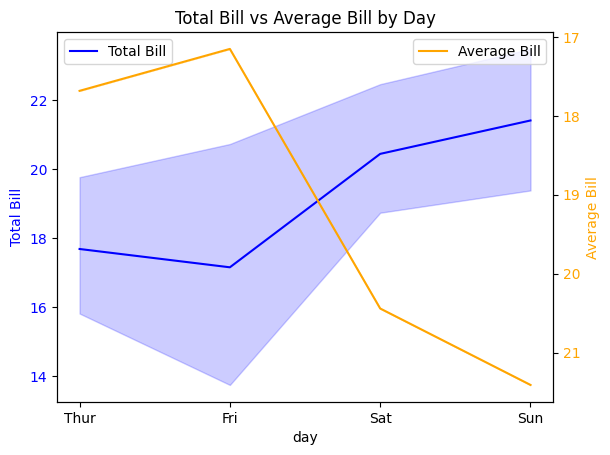

In [32]:
import matplotlib.pyplot as plt
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot total bill (primary axis)
sns.lineplot(x=df1['day'], y=df1['total_bill'], data=data, ax=ax1, color='blue', label='Total Bill')
ax1.set_ylabel('Total Bill', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the average bill
ax2 = ax1.twinx()
sns.lineplot(x=df1['day'], y=df1['day_encoded'], data=data, ax=ax2, color='orange', label='Average Bill')
ax2.set_ylabel('Average Bill', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show the plot
plt.title('Total Bill vs Average Bill by Day')
plt.show()
